<a href="https://colab.research.google.com/github/meet47/Paris-House-Price-Prediction/blob/main/ParisHousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Paris House Price Prediction**

Let's import Data Analysis and Data Visualization Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

Import CSV File to read data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ParisHousing.csv to ParisHousing.csv


In [ ]:
df = pd.read_csv('ParisHousing.csv')

Let's checkout some information of the data by .head() method

In [ ]:
df.head()

squareMeters  numberOfRooms  ...  hasGuestRoom      price
0         75523              3  ...             7  7559081.5
1         80771             39  ...             2  8085989.5
2         55712             58  ...             9  5574642.1
3         32316             47  ...             3  3232561.2
4         70429             19  ...             4  7055052.0

[5 rows x 17 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

.describe() method will gives you some statistical data about your actual data

In [ ]:
df.describe()

squareMeters  numberOfRooms  ...  hasGuestRoom         price
count   10000.00000   10000.000000  ...   10000.00000  1.000000e+04
mean    49870.13120      50.358400  ...       4.99460  4.993448e+06
std     28774.37535      28.816696  ...       3.17641  2.877424e+06
min        89.00000       1.000000  ...       0.00000  1.031350e+04
25%     25098.50000      25.000000  ...       2.00000  2.516402e+06
50%     50105.50000      50.000000  ...       5.00000  5.016180e+06
75%     74609.75000      75.000000  ...       8.00000  7.469092e+06
max     99999.00000     100.000000  ...      10.00000  1.000677e+07

[8 rows x 17 columns]

Let's try to find correlation among various features

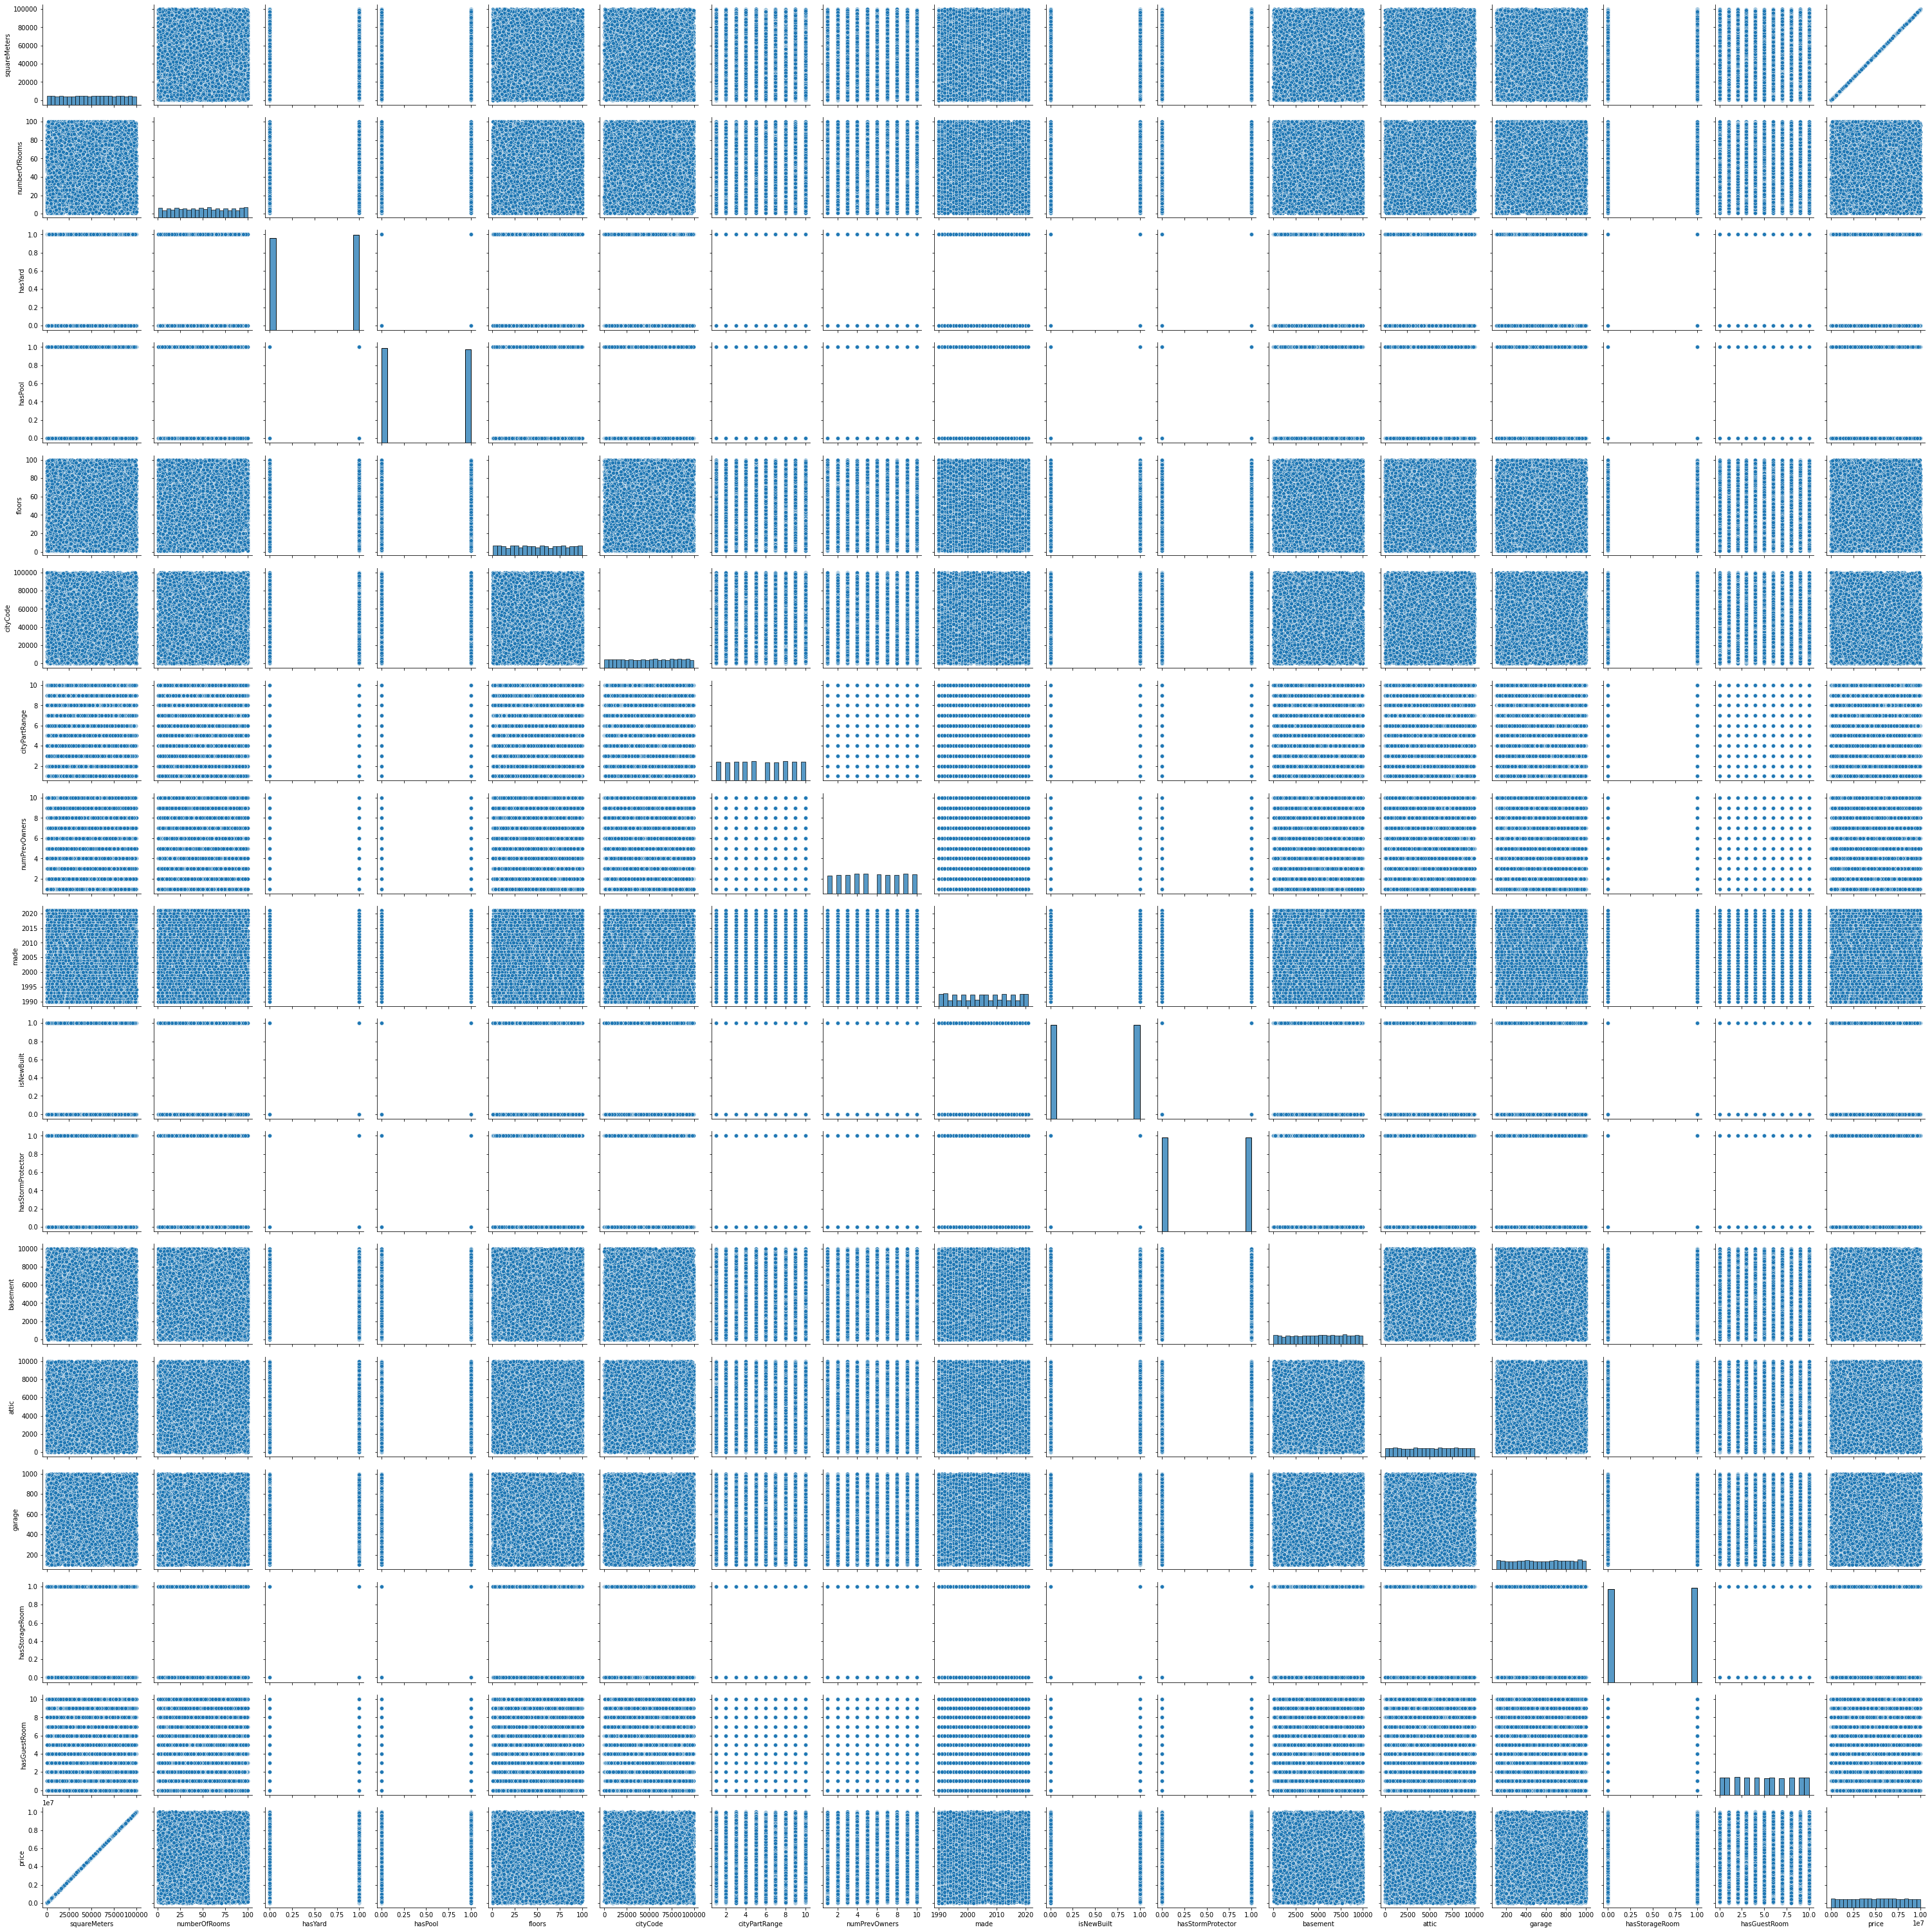

In [ ]:
sns.pairplot(df)

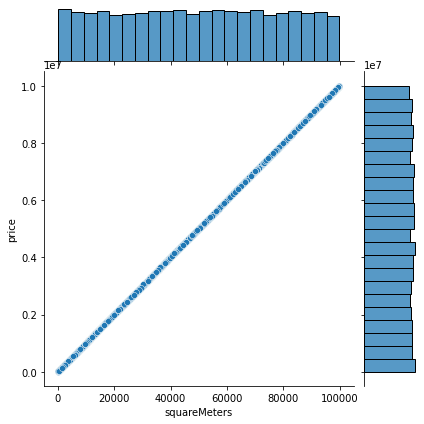

In [ ]:
sns.jointplot(data=df, x="squareMeters", y="price")

Let's import LinearRegression model from sklearn and train_test_split method to make split of actual data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [ ]:
X = df[['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom']]

In [ ]:
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Create instance of LinearRegression 

In [ ]:
lm = LinearRegression()

Fit the train data to model 

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lm.coef_)

[ 1.00000271e+02  3.86595390e-01  3.06507994e+03  2.94305140e+03
  5.50409284e+01 -9.79971773e-04  5.74682580e+01  4.49691379e+00
 -2.28170450e+00  1.37570136e+02  1.66614028e+02 -7.33274808e-03
 -9.96487517e-03  1.63312783e-01  3.75952174e+01 -6.95885129e+00]


Coefficent metrics let you know that by changing 1 unit in corresponding feature how much change we can get in final output by making other feature constant 

In [ ]:
cdf = pd.DataFrame(lm.coef_ , X.columns)

In [ ]:
cdf

0
squareMeters        100.000271
numberOfRooms         0.386595
hasYard            3065.079938
hasPool            2943.051395
floors               55.040928
cityCode             -0.000980
cityPartRange        57.468258
numPrevOwners         4.496914
made                 -2.281704
isNewBuilt          137.570136
hasStormProtector   166.614028
basement             -0.007333
attic                -0.009965
garage                0.163313
hasStorageRoom       37.595217
hasGuestRoom         -6.958851

Finally, Let's make predictions

In [ ]:
predictions = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


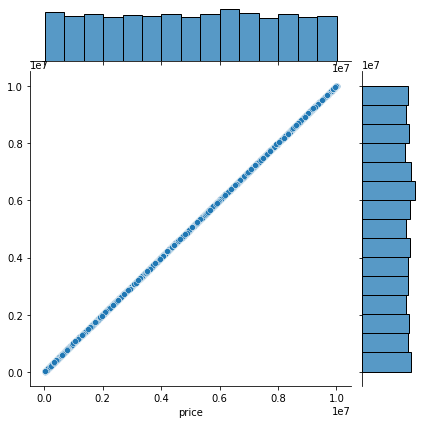

In [ ]:
sns.jointplot(y_test, predictions)

y_test vs predictions gives and optimal graph it means our model works perfectly!

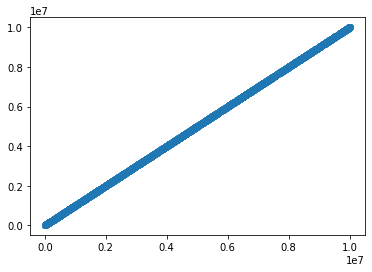

In [ ]:
plt.scatter(y_test, predictions)

Let's find out some factors to check efficiency of our models

In [ ]:
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 1496.3349969221365
MSE 3683688.3838205617
RMSE 1919.293720049269


In [ ]:
metrics.explained_variance_score(y_test, predictions)

0.9999995554531842